In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data=pd.read_csv('Banglore_traffic_Dataset.csv')

In [7]:
data.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No
1,2022-01-01,Indiranagar,CMH Road,30825,29.377125,1.500000,100.000000,100.000000,1,111.650,41.924899,91.407038,59.983689,100,Clear,No
2,2022-01-01,Whitefield,Marathahalli Bridge,7399,54.474398,1.039069,28.347994,36.396525,0,64.798,44.662384,61.375541,95.466020,189,Clear,No
3,2022-01-01,Koramangala,Sony World Junction,60874,43.817610,1.500000,100.000000,100.000000,1,171.748,32.773123,75.547092,63.567452,111,Clear,No
4,2022-01-01,Koramangala,Sarjapur Road,57292,41.116763,1.500000,100.000000,100.000000,3,164.584,35.092601,64.634762,93.155171,104,Clear,No


In [8]:
data.columns.values

array(['Date', 'Area Name', 'Road/Intersection Name', 'Traffic Volume',
       'Average Speed', 'Travel Time Index', 'Congestion Level',
       'Road Capacity Utilization', 'Incident Reports',
       'Environmental Impact', 'Public Transport Usage',
       'Traffic Signal Compliance', 'Parking Usage',
       'Pedestrian and Cyclist Count', 'Weather Conditions',
       'Roadwork and Construction Activity'], dtype=object)

In [9]:
data.dtypes

,0
Date,object
Area Name,object
Road/Intersection Name,object
Traffic Volume,int64
Average Speed,float64
Travel Time Index,float64
Congestion Level,float64
Road Capacity Utilization,float64
Incident Reports,int64
Environmental Impact,float64


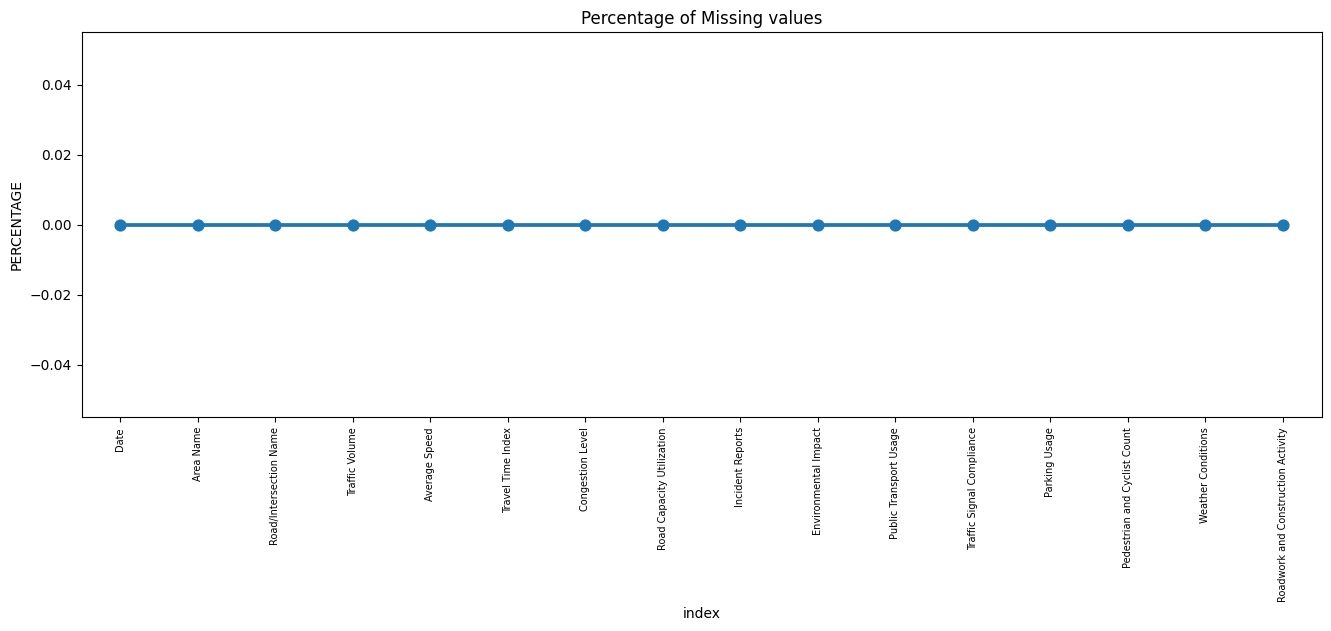

In [10]:
#handle missing values
missing = pd.DataFrame((data.isnull().sum())*100/data.shape[0]).reset_index()
plt.figure(figsize=(16,5))
ax = sns.pointplot(x='index',y=0,data=missing)
plt.xticks(rotation =90,fontsize =7)
plt.title("Percentage of Missing values")
plt.ylabel("PERCENTAGE")
plt.show()

In [11]:
#creating previous day traffic volume
data['Date']=pd.to_datetime(data['Date'])
data=data.sort_values(by='Date')
data['prev_day_traffic_vol']=data['Traffic Volume'].shift(1)
data['prev_day_traffic_vol'].fillna(0, inplace=True)

<ipython-input-11-e03919b578e0>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['prev_day_traffic_vol'].fillna(0, inplace=True)


In [12]:
data.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity,prev_day_traffic_vol
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No,0.0
11,2022-01-01,Yeshwanthpur,Yeshwanthpur Circle,15043,47.969847,1.354835,55.740844,76.635316,0,80.086,21.314010,95.942168,80.321453,105,Clear,No,50590.0
10,2022-01-01,Hebbal,Ballari Road,38446,26.144876,1.500000,100.000000,100.000000,3,126.892,48.864057,81.186023,62.092615,84,Overcast,No,15043.0
9,2022-01-01,Hebbal,Hebbal Flyover,31760,56.904556,1.500000,97.672462,100.000000,1,113.520,12.854260,83.635718,83.878218,91,Clear,No,38446.0
7,2022-01-01,Jayanagar,Jayanagar 4th Block,25379,38.455179,1.500000,79.038823,100.000000,2,100.758,46.315344,88.120758,68.181480,92,Clear,No,31760.0


In [13]:
# Calculate the daily average traffic volume for each area and intersection
data['Daily Average Traffic Volume'] = data.groupby(['Date', 'Area Name', 'Road/Intersection Name'])['Traffic Volume'].transform('mean')

# Define a threshold for peak vs. off-peak (e.g., top 25%)
threshold = data['Daily Average Traffic Volume'].quantile(0.75)

# Categorize as 'Peak' or 'Off-Peak'
data['Traffic Period'] = data['Daily Average Traffic Volume'].apply(lambda x: 'Peak' if x >= threshold else 'Off-Peak')

In [14]:
data.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity,prev_day_traffic_vol,Daily Average Traffic Volume,Traffic Period
0,2022-01-01,Indiranagar,100 Feet Road,50590,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No,0.0,50590.0,Peak
11,2022-01-01,Yeshwanthpur,Yeshwanthpur Circle,15043,47.969847,1.354835,55.740844,76.635316,0,80.086,21.314010,95.942168,80.321453,105,Clear,No,50590.0,15043.0,Off-Peak
10,2022-01-01,Hebbal,Ballari Road,38446,26.144876,1.500000,100.000000,100.000000,3,126.892,48.864057,81.186023,62.092615,84,Overcast,No,15043.0,38446.0,Peak
9,2022-01-01,Hebbal,Hebbal Flyover,31760,56.904556,1.500000,97.672462,100.000000,1,113.520,12.854260,83.635718,83.878218,91,Clear,No,38446.0,31760.0,Off-Peak
7,2022-01-01,Jayanagar,Jayanagar 4th Block,25379,38.455179,1.500000,79.038823,100.000000,2,100.758,46.315344,88.120758,68.181480,92,Clear,No,31760.0,25379.0,Off-Peak


In [15]:
#Normalizing values
from sklearn.preprocessing import StandardScaler

In [16]:
# Initialize the scaler
scaler = StandardScaler()
standardized_data = scaler.fit_transform(data[['Traffic Volume']])
# Replace original columns with standardized values
data['Traffic Volume'] = standardized_data


In [17]:
st_data_sp=scaler.fit_transform(data[['Average Speed']])
data['Traffic Volume']=st_data_sp

In [18]:
st_data_pv=scaler.fit_transform(data[['prev_day_traffic_vol']])
data['prev_day_traffic_vol']=st_data_pv

In [19]:
data.head()

,Date,Area Name,Road/Intersection Name,Traffic Volume,Average Speed,Travel Time Index,Congestion Level,Road Capacity Utilization,Incident Reports,Environmental Impact,Public Transport Usage,Traffic Signal Compliance,Parking Usage,Pedestrian and Cyclist Count,Weather Conditions,Roadwork and Construction Activity,prev_day_traffic_vol,Daily Average Traffic Volume,Traffic Period
0,2022-01-01,Indiranagar,100 Feet Road,1.007120,50.230299,1.500000,100.000000,100.000000,0,151.180,70.632330,84.044600,85.403629,111,Clear,No,-2.248134,50590.0,Peak
11,2022-01-01,Yeshwanthpur,Yeshwanthpur Circle,0.795994,47.969847,1.354835,55.740844,76.635316,0,80.086,21.314010,95.942168,80.321453,105,Clear,No,1.642252,15043.0,Off-Peak
10,2022-01-01,Hebbal,Ballari Road,-1.242458,26.144876,1.500000,100.000000,100.000000,3,126.892,48.864057,81.186023,62.092615,84,Overcast,No,-1.091323,38446.0,Peak
9,2022-01-01,Hebbal,Hebbal Flyover,1.630495,56.904556,1.500000,97.672462,100.000000,1,113.520,12.854260,83.635718,83.878218,91,Clear,No,0.708375,31760.0,Off-Peak
7,2022-01-01,Jayanagar,Jayanagar 4th Block,-0.092676,38.455179,1.500000,79.038823,100.000000,2,100.758,46.315344,88.120758,68.181480,92,Clear,No,0.194219,25379.0,Off-Peak


In [20]:
# Filter train and test data
train_data = data[data['Date'] < '2024-07-01']
test_data = data[(data['Date'] >= '2024-07-01') & (data['Date'] <= '2024-08-09')]

In [21]:
# Aggregate traffic volume by date
daily_train = train_data.groupby('Date')['Traffic Volume'].sum().reset_index()
daily_test = test_data.groupby('Date')['Traffic Volume'].sum().reset_index()

In [22]:
#Using ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose

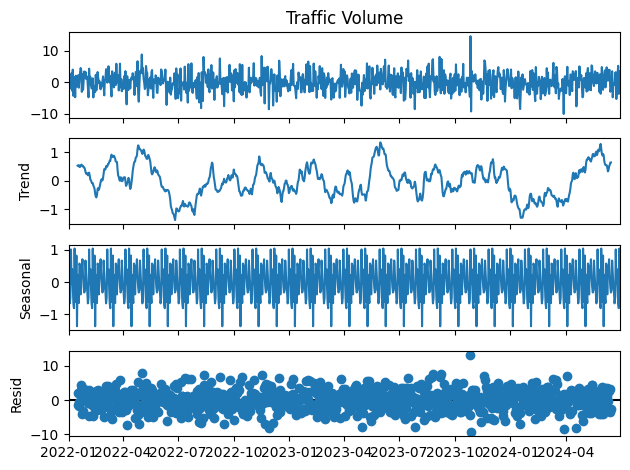

<Figure size 1200x8000 with 0 Axes>

In [23]:
daily_train.set_index('Date', inplace=True)
result = seasonal_decompose(daily_train['Traffic Volume'], model='additive', period=30)  # Assume monthly seasonality
result.plot()
plt.figure(figsize=(12, 80))
plt.show()

In [24]:
#Checking stationarity
from statsmodels.tsa.stattools import adfuller

result = adfuller(daily_train['Traffic Volume'])
print("ADF Statistic:", result[0])
print("p-value:", result[1])

if result[1] > 0.05:
    print("Time series is not stationary. Differencing is needed.")

ADF Statistic: -16.53988533457445
p-value: 1.9882922076425408e-29


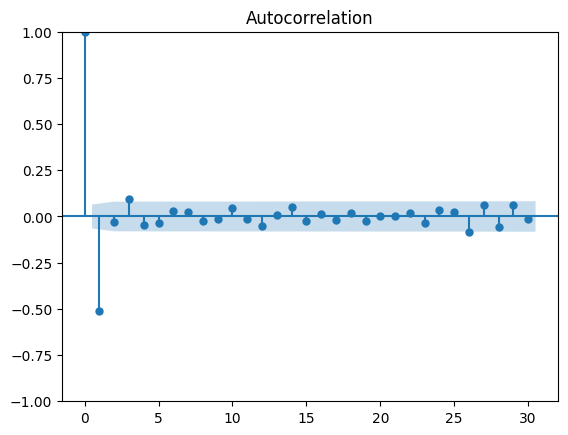

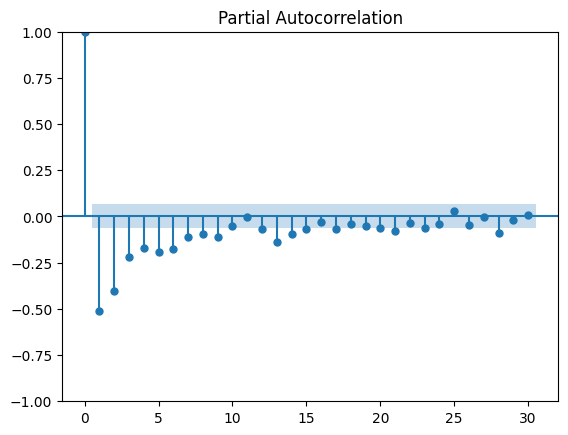

In [25]:
#Plot ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Calculate the first difference of 'Traffic Volume'
daily_train['Differenced'] = daily_train['Traffic Volume'].diff()

# ACF plot (q)
plot_acf(daily_train['Differenced'].dropna(), lags=30)
plt.show()

# PACF plot (p)
plot_pacf(daily_train['Differenced'].dropna(), lags=30)
plt.show()

In [26]:
from statsmodels.tsa.arima.model import ARIMA

In [27]:
model = ARIMA(daily_train['Traffic Volume'], order=(1, 0, 1))  # Replace p, d, q with values from ACF/PACF plots
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:         Traffic Volume   No. Observations:                  912
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -2301.020
Date:                Tue, 31 Dec 2024   AIC                           4610.041
Time:                        12:20:17   BIC                           4629.303
Sample:                    01-01-2022   HQIC                          4617.395
                         - 06-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0130      0.095     -0.137      0.891      -0.200       0.174
ar.L1          0.0588      0.735      0.080      0.936      -1.382       1.500
ma.L1         -0.1045      0.733     -0.143      0.8

In [28]:
# Forecast
forecast = model_fit.forecast(steps=len(daily_test))
print(forecast)

2024-07-01   -0.024279
2024-07-02   -0.013702
2024-07-03   -0.013081
2024-07-04   -0.013045
2024-07-05   -0.013042
2024-07-06   -0.013042
2024-07-07   -0.013042
2024-07-08   -0.013042
2024-07-09   -0.013042
2024-07-10   -0.013042
2024-07-11   -0.013042
2024-07-12   -0.013042
2024-07-13   -0.013042
2024-07-14   -0.013042
2024-07-15   -0.013042
2024-07-16   -0.013042
2024-07-17   -0.013042
2024-07-18   -0.013042
2024-07-19   -0.013042
2024-07-20   -0.013042
2024-07-21   -0.013042
2024-07-22   -0.013042
2024-07-23   -0.013042
2024-07-24   -0.013042
2024-07-25   -0.013042
2024-07-26   -0.013042
2024-07-27   -0.013042
2024-07-28   -0.013042
2024-07-29   -0.013042
2024-07-30   -0.013042
2024-07-31   -0.013042
2024-08-01   -0.013042
2024-08-02   -0.013042
2024-08-03   -0.013042
2024-08-04   -0.013042
2024-08-05   -0.013042
2024-08-06   -0.013042
2024-08-07   -0.013042
2024-08-08   -0.013042
2024-08-09   -0.013042
Freq: D, Name: predicted_mean, dtype: float64


In [29]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

models = SARIMAX(data['Traffic Volume'],
                order=(1, 0, 1),  # Replace with optimal p, d, q
                seasonal_order=(1, 0, 1, 24),  # Replace s with seasonal period
                enforce_stationarity=False,
                enforce_invertibility=False)
results = models.fit()
print(results.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                     Traffic Volume   No. Observations:                 8936
Model:             SARIMAX(1, 0, 1)x(1, 0, 1, 24)   Log Likelihood              -12644.443
Date:                            Tue, 31 Dec 2024   AIC                          25298.885
Time:                                    12:20:30   BIC                          25334.360
Sample:                                         0   HQIC                         25310.962
                                           - 8936                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2483      1.230     -0.202      0.840      -2.660       2.163
ma.L1          4.0467     20.153   

In [30]:
# Forecast
forecast = results.forecast(steps=len(daily_test))
print(forecast)

8936   -0.002389
8937    0.015132
8938   -0.011202
8939   -0.010516
8940   -0.000371
8941   -0.010278
8942    0.000926
8943   -0.004594
8944    0.014496
8945    0.001583
8946   -0.002845
8947   -0.008563
8948    0.026792
8949   -0.017148
8950   -0.008551
8951    0.015791
8952   -0.015900
8953   -0.000968
8954   -0.023043
8955   -0.002519
8956   -0.021013
8957    0.009408
8958   -0.020895
8959   -0.013115
8960    0.000798
8961   -0.004326
8962    0.003188
8963    0.002984
8964    0.000106
8965    0.002918
8966   -0.000263
8967    0.001304
8968   -0.004116
8969   -0.000449
8970    0.000808
8971    0.002431
8972   -0.007607
8973    0.004869
8974    0.002428
8975   -0.004483
Name: predicted_mean, dtype: float64


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [31]:
#LSTM
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [32]:
# Create lagged data
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

In [33]:
seq_length = 7  # Use the past 7 days
X, y = create_sequences(standardized_data, seq_length)

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [40]:
#define the model
ls_model = Sequential([
    LSTM(50, activation='relu', input_shape=(seq_length, 1)),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [41]:
ls_model.compile(optimizer='adam', loss='mse')

In [42]:
# Train the model
ls_model.fit(X, y, epochs=20, batch_size=32)

Epoch 1/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - loss: 0.9812
Epoch 2/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1.0095
Epoch 3/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - loss: 1.0080
Epoch 4/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9965
Epoch 5/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 1.0234
Epoch 6/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.9974
Epoch 7/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9900
Epoch 8/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.9759
Epoch 9/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 1.0093
Epoch 10/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - loss: 0.9949
Epoch 11/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.9874
Epoch 12/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 1.0129
Epoch 13/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.9965
Epoch 14/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - loss: 0.9979
Epoch 15/20
280/280 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step -

In [43]:
last_sequence = standardized_data[-seq_length:]
forecast = []

for _ in range(30):  # Predict for 30 days
    next_value = ls_model.predict(last_sequence.reshape(1, seq_length, 1))
    forecast.append(next_value[0][0])
    last_sequence = np.append(last_sequence[1:], next_value, axis=0)

# Inverse transform the forecast
forecast = np.array(forecast).reshape(-1, 1)
forecast = scaler.inverse_transform(forecast)
print(forecast)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 241ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━

In [39]:
import pickle

# Save the ARIMA model
with open('arima_model.pkl', 'wb') as arima_file:
    pickle.dump(model, arima_file)

# Save the SARIMA model
with open('sarima_model.pkl', 'wb') as sarima_file:
    pickle.dump(models, sarima_file)

In [44]:
ls_model.save('lstm_model.h5')